# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration 
- Triaxial Angular velocity from the gyroscope 
- A 561-feature vector with time and frequency domain variables 
- The activity label 

More information about the features are available on the website linked above.


In [1]:
!pip install seaborn  
!pip install pandas
!pip install numpy
!pip install  matplotlib
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Định nghĩa một hàm tên là 'warn' có thể nhận bất kỳ số lượng đối số nào (*args, **kwargs)
# Hàm này dùng 'pass', nghĩa là không làm gì cả — chỉ là một "placeholder" (hàm trống).
def warn(*args, **kwargs):
    pass

# Import module 'warnings' — đây là thư viện chuẩn của Python dùng để hiển thị cảnh báo (warnings)
import warnings

# Gán (thay thế) hàm 'warnings.warn' mặc định bằng hàm 'warn' vừa định nghĩa ở trên.
# Tức là: từ giờ trở đi, bất cứ lệnh nào gọi 'warnings.warn(...)' sẽ KHÔNG hiển thị cảnh báo gì nữa.
warnings.warn = warn


In [3]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts.
* Determine if the floating point values need to be scaled.
* Determine the breakdown of each activity.
* Encode the activity label as an integer.


In [4]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

The data columns are all floats except for the activity label.


In [5]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [6]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [7]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [8]:
data.iloc[:, :-1].max().value_counts()

1.0    561
Name: count, dtype: int64

Examine the breakdown of activities; they are relatively balanced.


In [9]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

5973    0
2903    2
6760    4
7842    2
5066    2
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values.
* Identify those that are most correlated (either positively or negatively).


In [11]:

feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):

    corr_values.iloc[coord[0], coord[1]] = np.nan 

corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

corr_values['abs_correlation'] = corr_values.correlation.abs()


A histogram of the absolute value correlations.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

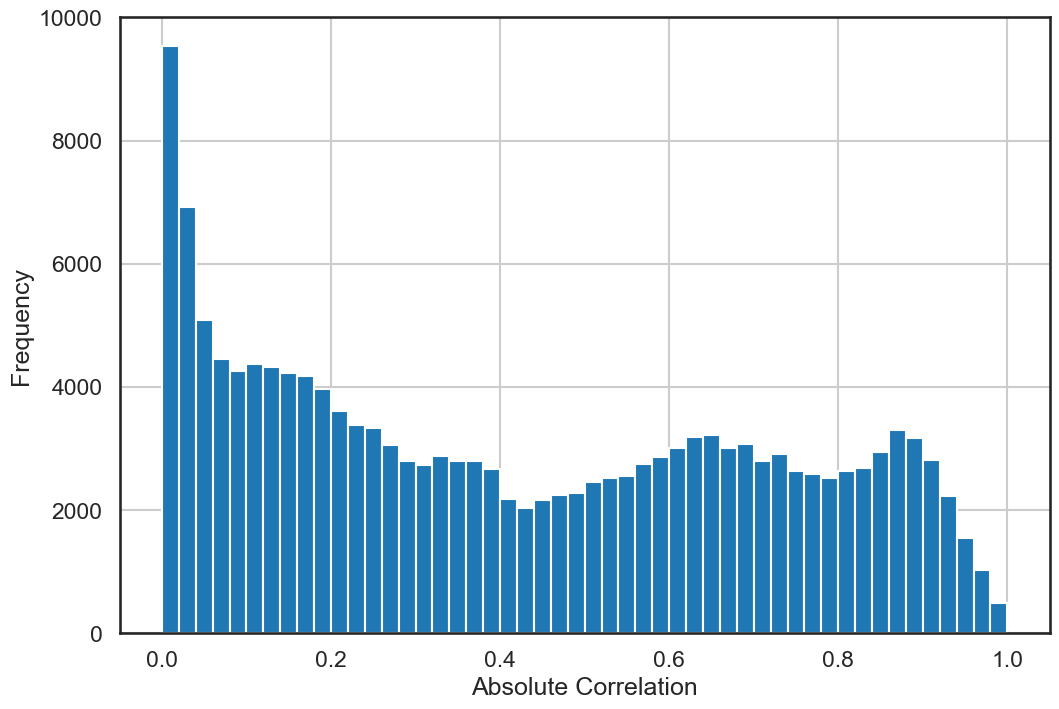

In [13]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [14]:

corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')


,feature1,feature2,correlation,abs_correlation
93546,tBodyAccMag-min(),tGravityAccMag-min(),1.000000,1.000000
93897,tBodyAccMag-sma(),tGravityAccMag-mean(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
92831,tBodyAccMag-mad(),tGravityAccMag-mad(),1.000000,1.000000
105403,tBodyGyroMag-mean(),tBodyGyroMag-sma(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [15]:

from sklearn.model_selection import StratifiedShuffleSplit


strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [16]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(normalize=True)
### END SOLUTION

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [18]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [20]:

lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


## Question 5

* Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 


In [21]:

coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
40  -1.895226  2.977715  1.410856  0.139435  0.251904  0.117802 -2.557437   
451 -0.118887  2.071692 -2.240813  0.160768 -0.834991 -0.062779  0.000000   
508  0.111711  0.016696  0.040347 -1.081082  0.622971 -0.730937  0.000000   
74  -0.103817 -0.227167  0.241250 -0.309442 -0.179884  0.319094  0.000000   
507  0.019842 -0.053250 -0.322731 -1.004549  0.877976 -0.633997  0.000000   
553 -0.173055  0.014061  0.192994  0.285926 -0.800609  0.393219  0.000000   
429 -0.020936 -0.117267  0.046553  0.054385  0.126049  0.144729  0.000000   
68  -0.043405 -0.473232  0.159060 -0.238846  0.545092 -0.368635  0.000000   
366 -0.107944 -0.518178  0.612657  0.487723  0.230996  1.238864  0.000000   
173  0.012576 -0.029623 -0.245612 -0.074205 -0.378928  0.531937  0.021913   

                                                             l2             \
            1         2         3         4         5         0          1   
40   6.199102  0.976303  0.337536  0.000000  0.046984 -3.500076  11.443419   
451  1.301454 -1.899639  0.948657 -3.158818  0.003481 -0.179153   1.404806   
508  0.000000  0.000000 -1.060713  0.391891 -0.745299  0.185232   0.675333   
74   0.000000  0.000000 -0.403619  0.000000  0.129440 -0.194274  -1.330749   
507  0.000000 -0.973315 -2.390018  3.637762 -2.657186  0.051006   0.464716   
553  0.000000  0.120824  0.201336 -0.108558  0.607706 -0.500283  -1.253611   
429  0.000000  0.000000  0.297166  0.000000  0.716007 -0.027371   0.170910   
68  -1.461269  0.000000 -0.199212  0.197021 -0.545062 -0.137431  -2.134809   
366 -1.762173  0.624439  1.034099  0.226653  2.506100 -0.143836  -0.648474   
173  0.000000 -0.020246 -0.024312 -0.372023  0.969135  0.033489  -0.520403   

                                             
            2         3         4         5  
40   1.811497  0.256924  0.431934  0.376888  
451 -2.279625  0.267890 -1.776236 -0.033445  
508  0.008505 -2.594541  1.139703 -1.601913  
74   0.425363 -0.765801 -0.201144  0.264251  
507 -0.522498 -2.470274  1.625677 -1.461201  
553  0.476790  0.059853 -1.177476  0.545548  
429  0.055752  0.150760  0.192260  0.281395  
68   0.253180 -0.159665  0.945654 -0.858842  
366  1.191458  0.651672  0.454656  2.457461  
173 -0.320509 -0.218328 -0.761857  1.811971

Prepare six separate plots for each of the multi-class coefficients.


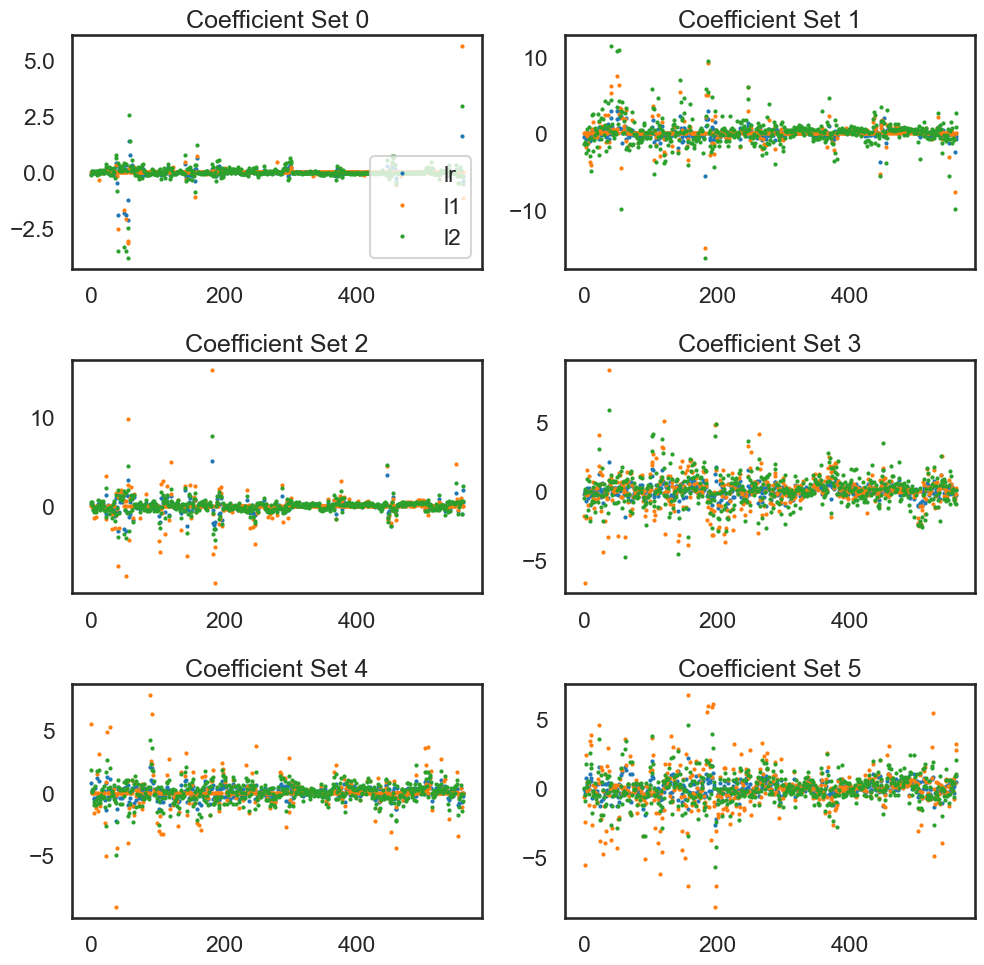

In [22]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 


In [ ]:
### BEGIN SOLUTION
# Tạo danh sách rỗng để lưu kết quả dự đoán nhãn và xác suất
y_pred = list()
y_prob = list()

# Danh sách tên mô hình và danh sách các mô hình logistic regression tương ứng
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

# Lặp qua từng mô hình và nhãn để dự đoán
for lab, mod in zip(coeff_labels, coeff_models):
    # Dự đoán nhãn cho tập kiểm tra và lưu vào Series
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    # Dự đoán xác suất (chọn giá trị xác suất cao nhất mỗi hàng) và lưu vào Series
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
# Gộp các kết quả dự đoán nhãn và xác suất của từng mô hình thành DataFrame
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

# Hiển thị 5 dòng đầu tiên của bảng kết quả dự đoán nhãn
y_pred.head()


,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [24]:
y_prob.head()
### END SOLUTION

,lr,l1,l2
0,0.998939,0.998967,0.999757
1,0.988165,0.999853,0.999477
2,0.987592,0.995959,0.999662
3,0.981381,0.999159,0.994338
4,0.998277,0.999919,0.999997


## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [ ]:
### BEGIN SOLUTION
# Import các hàm tính độ chính xác, ma trận nhầm lẫn, AUC, và chuẩn hóa nhãn
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Tạo danh sách lưu các chỉ số đánh giá và ma trận nhầm lẫn
metrics = list()
cm = dict()

# Lặp qua từng mô hình (lr, l1, l2)
for lab in coeff_labels:

    # Tính precision, recall, f1-score (có trọng số cho multi-class)
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # Tính độ chính xác tổng thể
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # Tính AUC cho bài toán nhiều lớp (phải binarize nhãn trước)
    auc = roc_auc_score(
        label_binarize(y_test, classes=[0,1,2,3,4,5]),
        label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]),
        average='weighted'
    )
    
    # Tạo ma trận nhầm lẫn cho từng mô hình
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    # Lưu các chỉ số vào Series rồi thêm vào danh sách
    metrics.append(pd.Series({
        'precision': precision,
        'recall': recall,
        'fscore': fscore,
        'accuracy': accuracy,
        'auc': auc
    }, name=lab))

# Gộp các chỉ số đánh giá của ba mô hình lại thành DataFrame
metrics = pd.concat(metrics, axis=1)


In [26]:
metrics
### END SOLUTION

,lr,l1,l2
precision,0.984144,0.984153,0.983824
recall,0.984142,0.984142,0.983819
fscore,0.984143,0.984140,0.983819
accuracy,0.984142,0.984142,0.983819
auc,0.990384,0.990342,0.990165


## Question 8

* Display or plot the confusion matrix for each model.


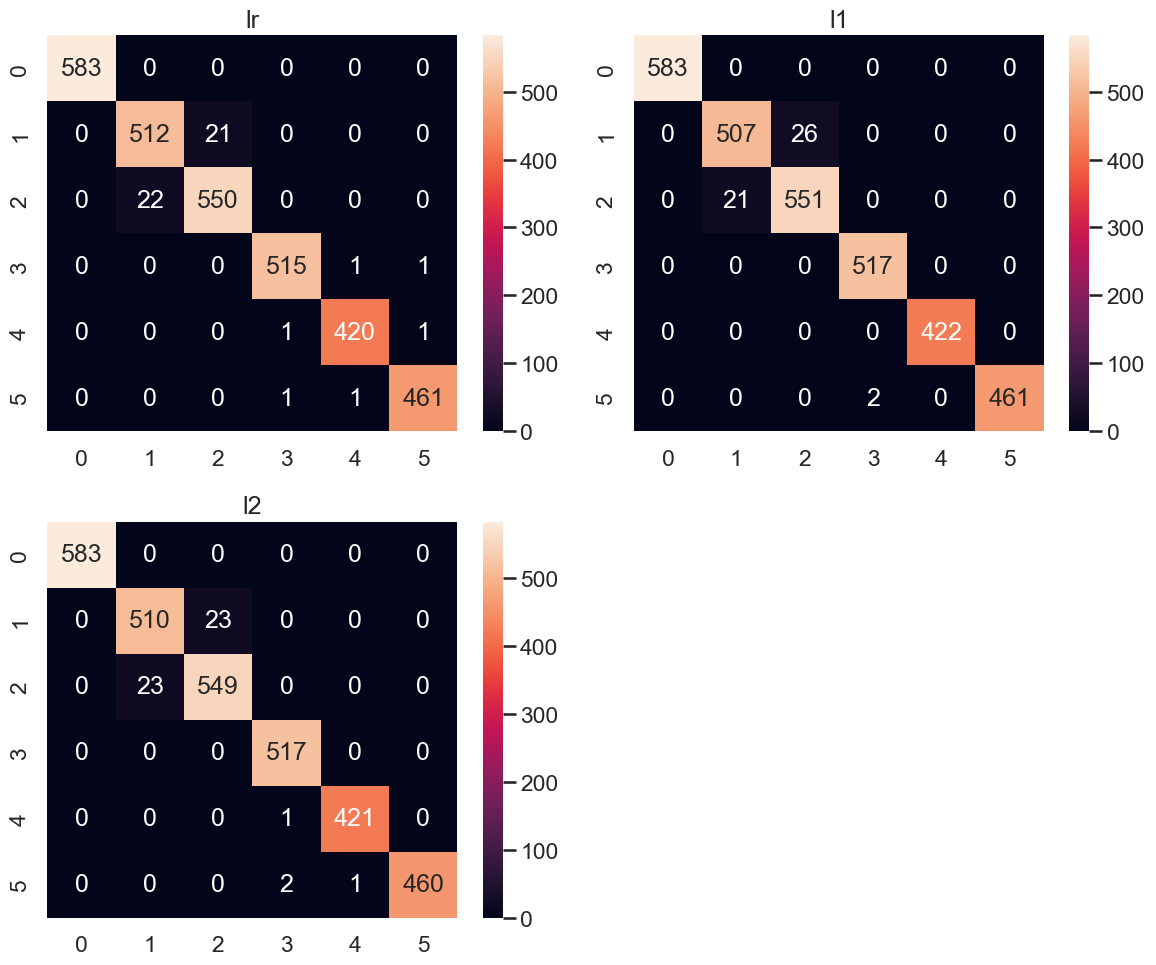

In [ ]:
### BEGIN SOLUTION
# Tạo lưới gồm 2 hàng × 2 cột để vẽ biểu đồ, trả về figure và danh sách các trục (axList)
fig, axList = plt.subplots(nrows=2, ncols=2)

# Làm phẳng mảng 2D thành danh sách 1D để dễ lặp qua
axList = axList.flatten()

# Đặt kích thước toàn bộ figure (chiều rộng 12, chiều cao 10 inch)
fig.set_size_inches(12, 10)

# Ẩn ô trống cuối cùng (vì chỉ có 3 biểu đồ cần hiển thị)
axList[-1].axis('off')

# Vẽ heatmap cho từng mô hình (lr, l1, l2)
for ax, lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d')  # hiển thị ma trận nhầm lẫn
    ax.set(title=lab)  # đặt tiêu đề cho mỗi biểu đồ

# Tự động căn chỉnh bố cục biểu đồ cho gọn gàng
plt.tight_layout()
### END SOLUTION


---
### Machine Learning Foundation (C) 2020 IBM Corporation
